In [50]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [51]:
# Paths for data.
Ravdess = "d:/kd244\downloads/archive (1)/audio_speech_actors_01-24/"
Crema = "d:/kd244/downloads/archive/AudioWAV/"
Tess = "d:/kd244/downloads/archive (2)/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "d:/kd244/downloads/archive (3)/ALL/"

In [52]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  d:/kd244\downloads/archive (1)/audio_speech_ac...
1  neutral  d:/kd244\downloads/archive (1)/audio_speech_ac...
2  neutral  d:/kd244\downloads/archive (1)/audio_speech_ac...
3  neutral  d:/kd244\downloads/archive (1)/audio_speech_ac...
4     calm  d:/kd244\downloads/archive (1)/audio_speech_ac...

In [53]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  d:/kd244/downloads/archive/AudioWAV/1001_DFA_A...
1  disgust  d:/kd244/downloads/archive/AudioWAV/1001_DFA_D...
2     fear  d:/kd244/downloads/archive/AudioWAV/1001_DFA_F...
3    happy  d:/kd244/downloads/archive/AudioWAV/1001_DFA_H...
4  neutral  d:/kd244/downloads/archive/AudioWAV/1001_DFA_N...

In [54]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  d:/kd244/downloads/archive (2)/TESS Toronto em...
1    angry  d:/kd244/downloads/archive (2)/TESS Toronto em...
2    angry  d:/kd244/downloads/archive (2)/TESS Toronto em...
3    angry  d:/kd244/downloads/archive (2)/TESS Toronto em...
4    angry  d:/kd244/downloads/archive (2)/TESS Toronto em...

In [55]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                           Path
0    angry  d:/kd244/downloads/archive (3)/ALL/DC_a01.wav
1    angry  d:/kd244/downloads/archive (3)/ALL/DC_a02.wav
2    angry  d:/kd244/downloads/archive (3)/ALL/DC_a03.wav
3    angry  d:/kd244/downloads/archive (3)/ALL/DC_a04.wav
4    angry  d:/kd244/downloads/archive (3)/ALL/DC_a05.wav

In [56]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  d:/kd244\downloads/archive (1)/audio_speech_ac...
1  neutral  d:/kd244\downloads/archive (1)/audio_speech_ac...
2  neutral  d:/kd244\downloads/archive (1)/audio_speech_ac...
3  neutral  d:/kd244\downloads/archive (1)/audio_speech_ac...
4     calm  d:/kd244\downloads/archive (1)/audio_speech_ac...

In [57]:
data_path.shape

(12162, 2)

In [58]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

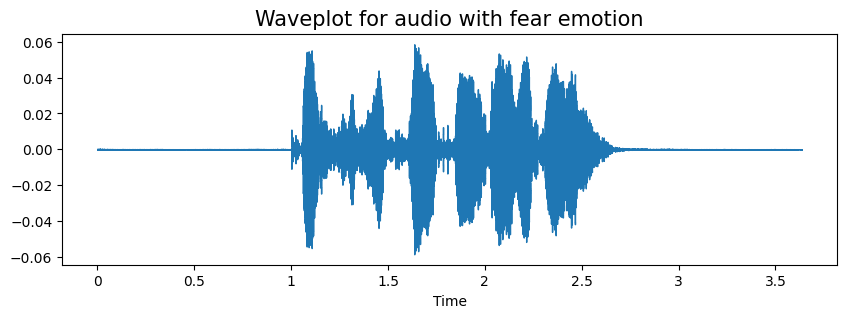

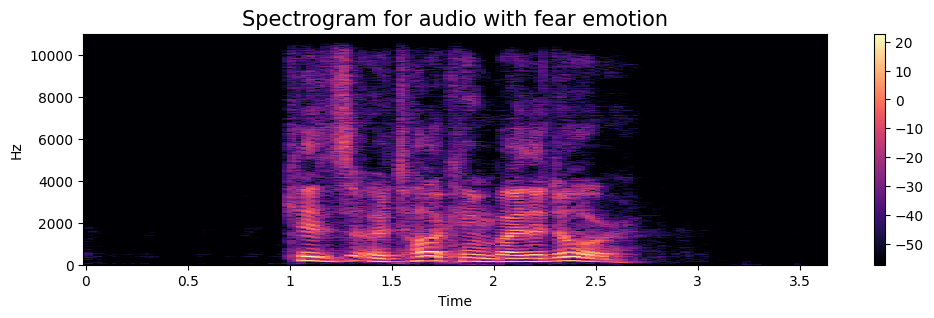

In [59]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

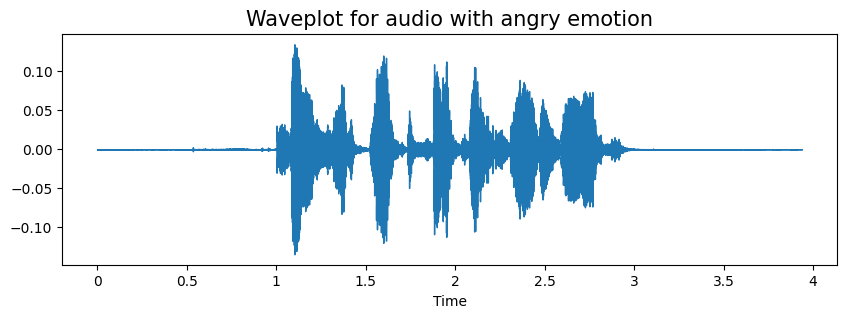

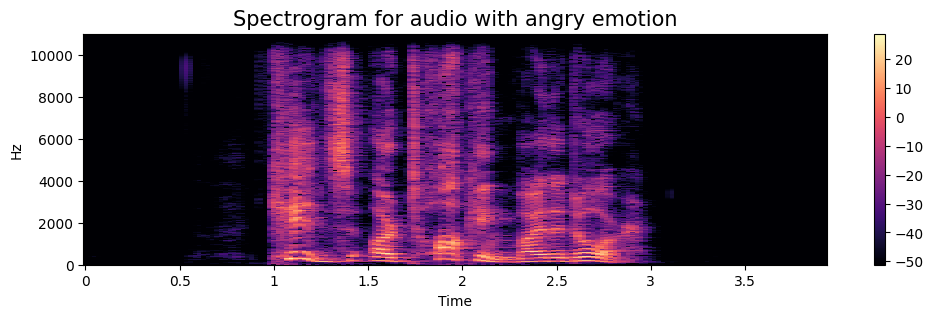

In [60]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

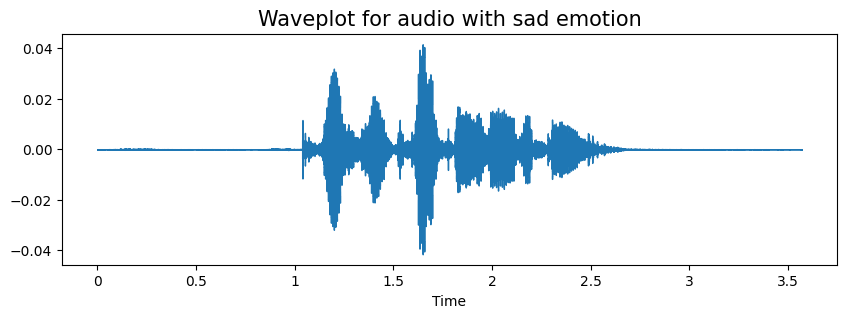

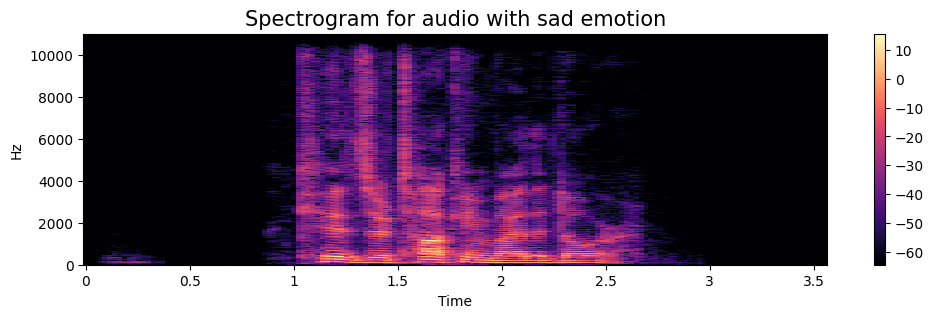

In [61]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

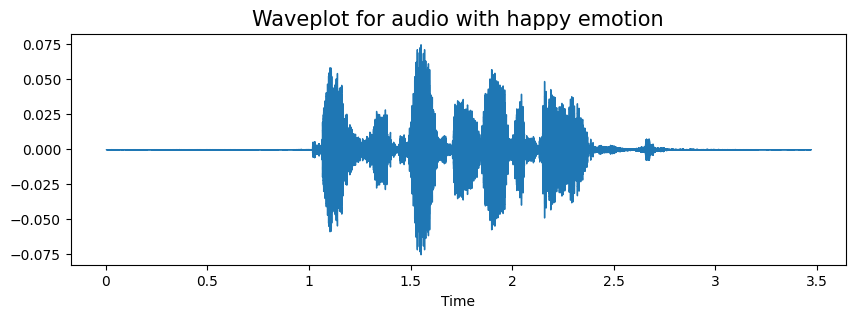

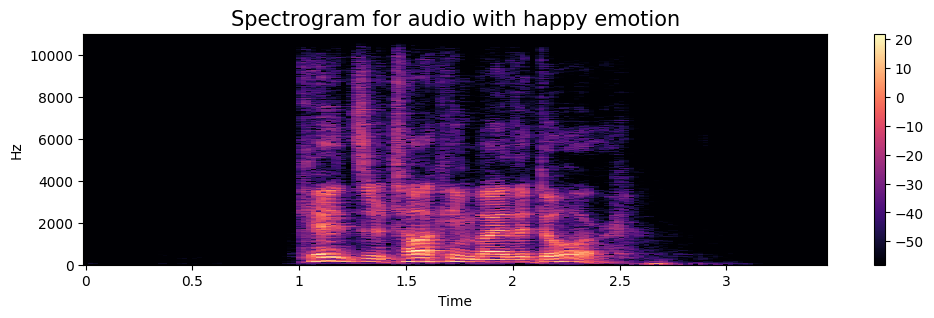

In [62]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


In [63]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

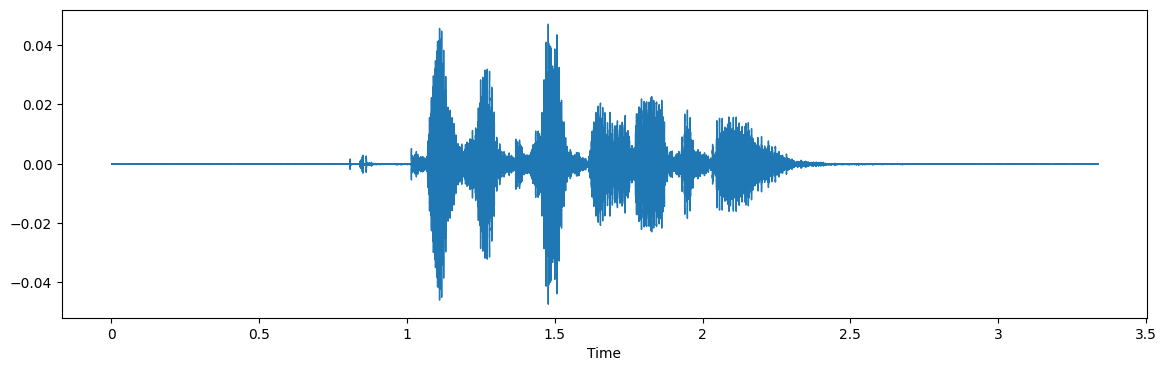

In [64]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

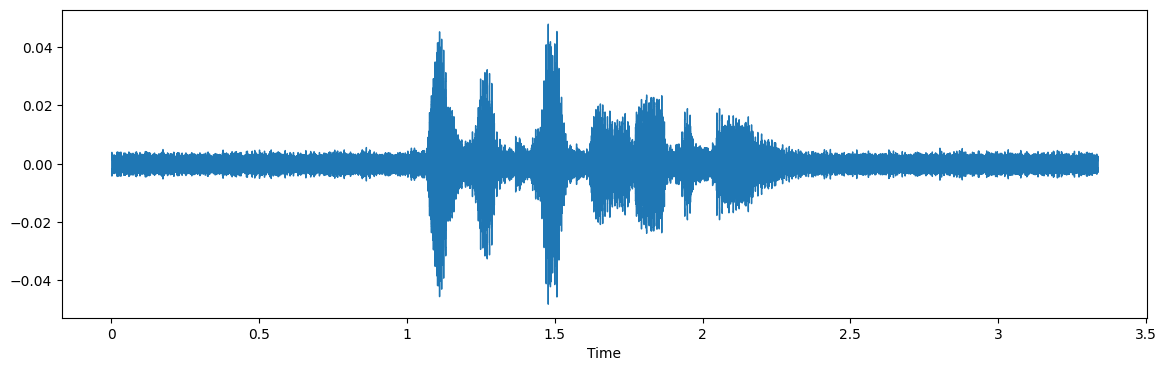

In [65]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

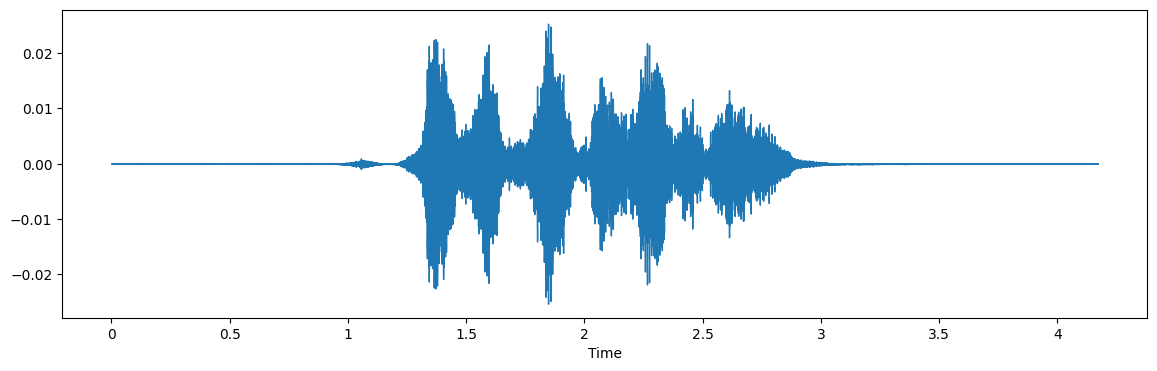

In [66]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

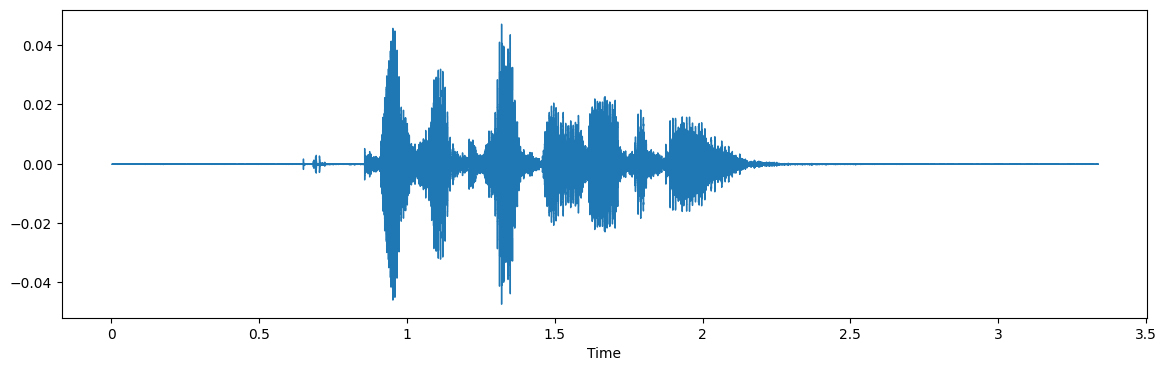

In [67]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

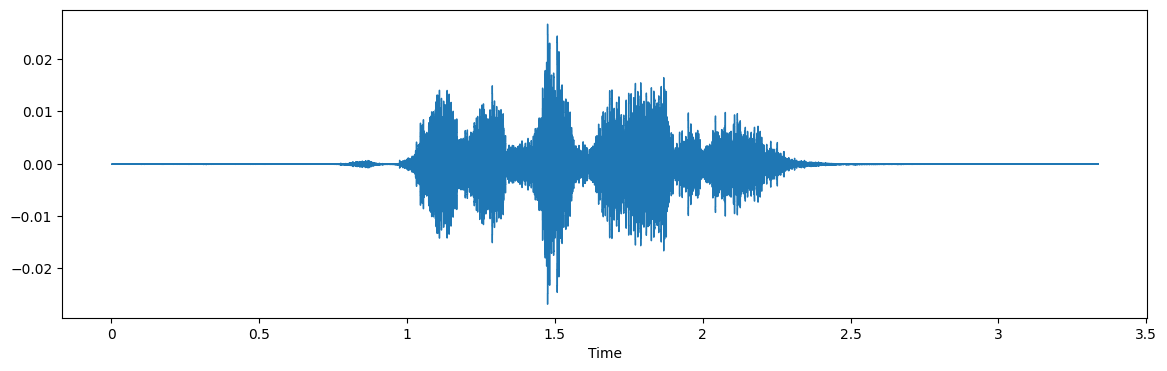

In [68]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [69]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [70]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [71]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [72]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.283226  0.739174  0.760110  0.738748  0.712194  0.687986  0.667279   
1  0.276250  0.731880  0.792024  0.763804  0.765234  0.768839  0.716074   
2  0.181467  0.629995  0.730929  0.743651  0.680889  0.670727  0.673700   
3  0.254530  0.676571  0.724970  0.725722  0.668644  0.645344  0.671470   
4  0.331760  0.796963  0.827134  0.812141  0.795677  0.802716  0.734992   

          7         8         9  ...           153           154  \
0  0.694000  0.742275  0.762594  ...  4.312694e-06  3.293364e-06   
1  0.668602  0.702574  0.730003  ...  5.625233e-06  4.605634e-06   
2  0.669033  0.709932  0.745144  ...  8.582505e-07  9.570447e-07   
3  0.631493  0.681748  0.709889  ...  6.987414e-06  7.038922e-06   
4  0.676669  0.722090  0.752484  ...  1.458618e-04  1.391668e-04   

            155           156           157           158           159  \
0  2.149553e-06  2.260914e-06  4.562520e-06  4.985617e-06  1.324619e-06   
1  3.388577e-06  3.538033e-06  5.962604e-06  6.458656e-06  2.543682e-06   
2  7.741540e-07  5.212421e-07  3.252106e-07  4.883136e-07  2.353670e-07   
3  6.659573e-06  6.937638e-06  1.117492e-05  5.767251e-06  2.024577e-06   
4  1.312119e-04  1.441479e-04  1.450159e-04  1.339062e-04  1.399235e-04   

            160           161   labels  
0  1.469305e-07  3.053402e-09  neutral  
1  1.350871e-06  1.203656e-06  neutral  
2  2.240905e-08  9.753157e-11  neutral  
3  1.944936e-07  2.701240e-09  neutral  
4  1.416687e-04  1.315676e-04  neutral  

[5 rows x 163 columns]

In [73]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [74]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [75]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [76]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [77]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

In [78]:
model=Sequential()
model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_21 (Conv1D)          (None, 162, 512)          3072      
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 81, 512)          0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 81, 256)           655616    
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 41, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_23 (Conv1D)          (None, 41, 128)           163968    
                                                                 
 max_pooling1d_23 (MaxPoolin  (None, 21, 128)         

In [79]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
428/428 [==============================] - 113s 261ms/step - loss: 1.7203 - accuracy: 0.3010 - val_loss: 1.4782 - val_accuracy: 0.4270 - lr: 0.0010
Epoch 2/100
428/428 [==============================] - 109s 254ms/step - loss: 1.4792 - accuracy: 0.4093 - val_loss: 1.3525 - val_accuracy: 0.4613 - lr: 0.0010
Epoch 3/100
428/428 [==============================] - 109s 256ms/step - loss: 1.3817 - accuracy: 0.4473 - val_loss: 1.2744 - val_accuracy: 0.4878 - lr: 0.0010
Epoch 4/100
428/428 [==============================] - 109s 255ms/step - loss: 1.3220 - accuracy: 0.4749 - val_loss: 1.2788 - val_accuracy: 0.4938 - lr: 0.0010
Epoch 5/100
428/428 [==============================] - 109s 255ms/step - loss: 1.2812 - accuracy: 0.4858 - val_loss: 1.2174 - val_accuracy: 0.5121 - lr: 0.0010
Epoch 6/100
428/428 [==============================] - 109s 254ms/step - loss: 1.2471 - accuracy: 0.5014 - val_loss: 1.1960 - val_accuracy: 0.5228 - lr: 0.0010
Epoch 7/100
428/428 [===================

286/286 [==============================] - 9s 32ms/step - loss: 1.5257 - accuracy: 0.6272
Accuracy of our model on test data :  62.71650791168213 %


ValueError: x and y must have same first dimension, but have shapes (100,) and (70,)

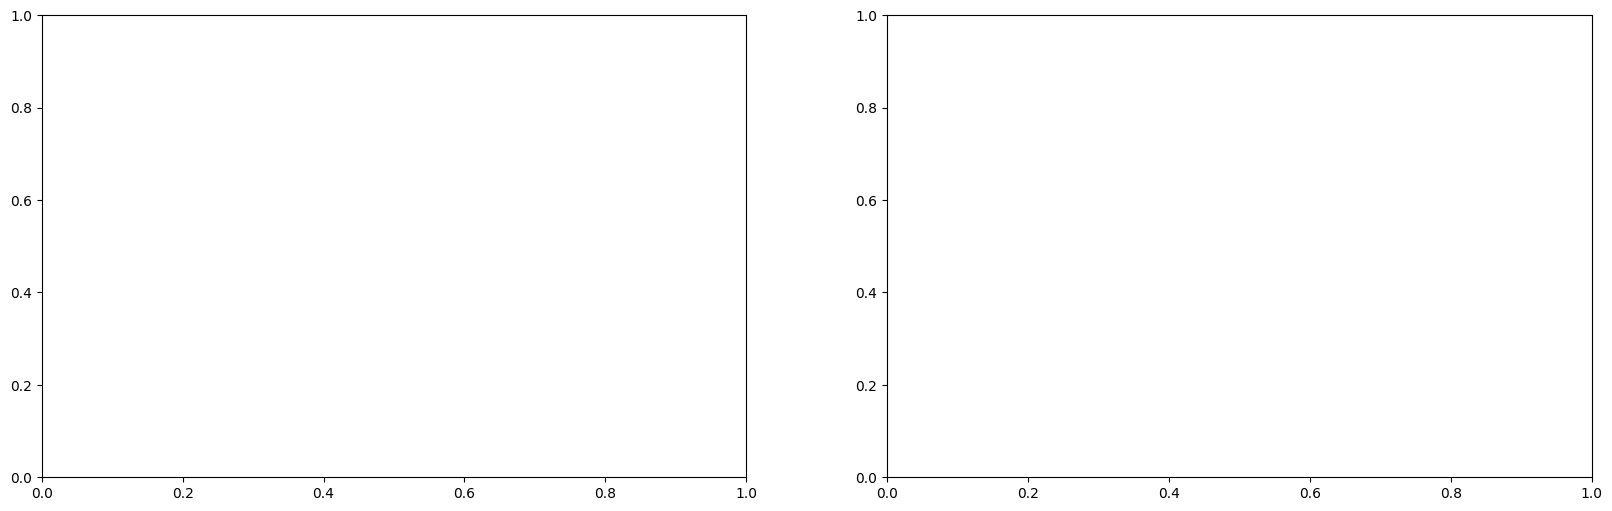

In [87]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [90]:
model2=Sequential()
model2.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model2.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model2.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model2.add(Dropout(0.4))

model2.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model2.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model2.add(Dropout(0.2))

model2.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model2.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))


model2.add(Flatten())
model2.add(Dense(units=32, activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(units=8, activation='softmax'))
model2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_31 (Conv1D)          (None, 162, 256)          1536      
                                                                 
 max_pooling1d_31 (MaxPoolin  (None, 81, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_32 (Conv1D)          (None, 81, 256)           327936    
                                                                 
 max_pooling1d_32 (MaxPoolin  (None, 41, 256)          0         
 g1D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 41, 256)           0         
                                                                 
 conv1d_33 (Conv1D)          (None, 41, 256)          

In [91]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=3, min_lr=0.0000001)
history=model2.fit(x_train, y_train, batch_size=50, epochs=100, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/100
547/548 [============================>.] - ETA: 0s - loss: 1.7249 - accuracy: 0.3047

ValueError: in user code:

    File "c:\Users\kd244\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\kd244\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\kd244\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\kd244\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1758, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\kd244\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\kd244\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\kd244\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\kd244\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\kd244\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\kd244\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 8) are incompatible


286/286 [==============================] - 15s 53ms/step - loss: 1.0407 - accuracy: 0.6221
Accuracy of our model on test data :  62.21223473548889 %


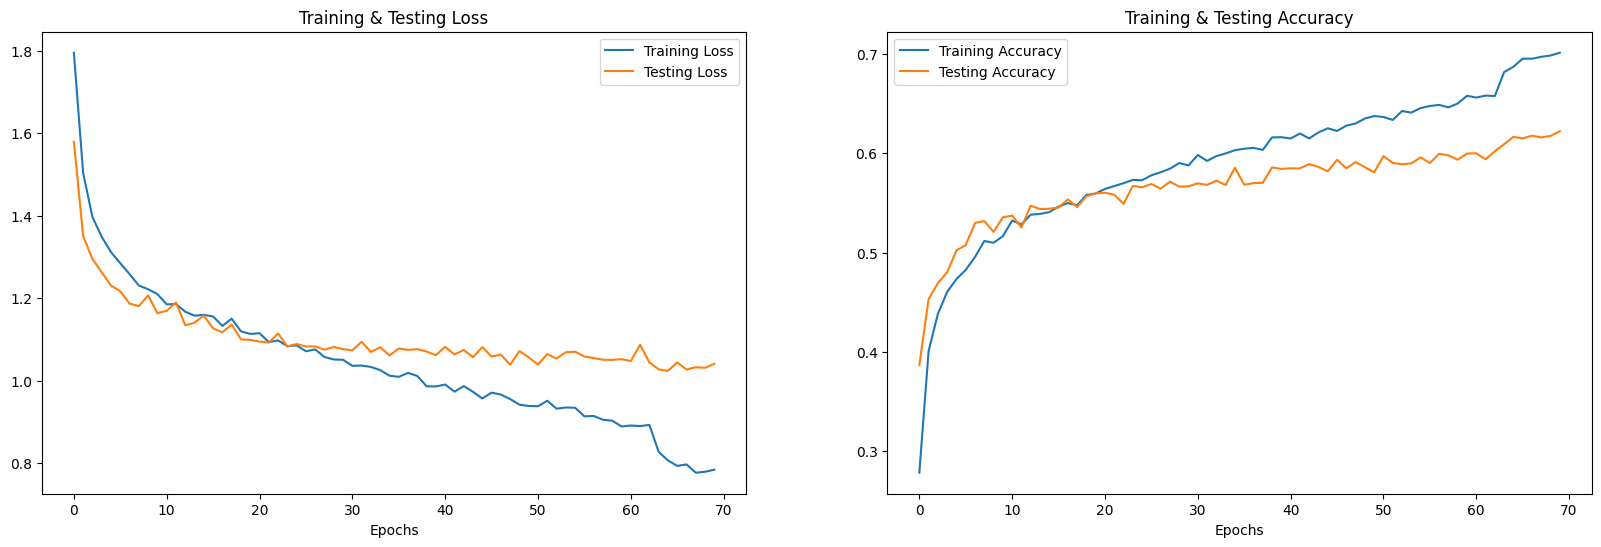

In [86]:
print("Accuracy of our model on test data : " , model2.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(70)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
model2.save('model512.h5')

In [88]:
# predicting on test data.
pred_test = model2.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

286/286 [==============================] - 15s 51ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0              sad       disgust
1          disgust       disgust
2            angry         angry
3          disgust       disgust
4             fear          fear
5          disgust          fear
6              sad         happy
7            happy         happy
8          disgust           sad
9          neutral           sad

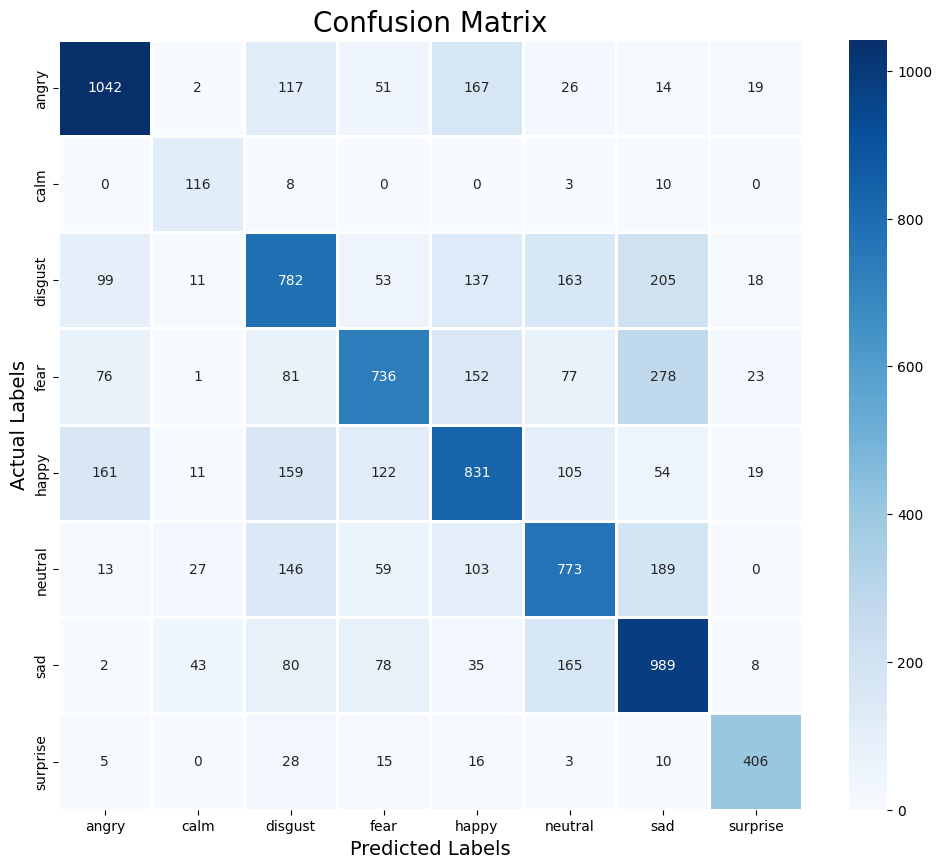

In [89]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.74      0.74      0.74      1438
        calm       0.61      0.81      0.70       137
     disgust       0.55      0.50      0.53      1468
        fear       0.65      0.52      0.58      1424
       happy       0.54      0.60      0.57      1462
     neutral       0.56      0.59      0.57      1310
         sad       0.58      0.66      0.62      1400
    surprise       0.87      0.84      0.85       483

    accuracy                           0.62      9122
   macro avg       0.64      0.66      0.64      9122
weighted avg       0.62      0.62      0.61      9122



1/1 [==============================] - 0s 16ms/step
sad
angry 0.0012744920
calm 0.0000341730
disgust 0.1927041560
fear 0.1128028259
happy 0.0132883759
neutral 0.1329675764
sad 0.5400536656
surprise 0.0068746964


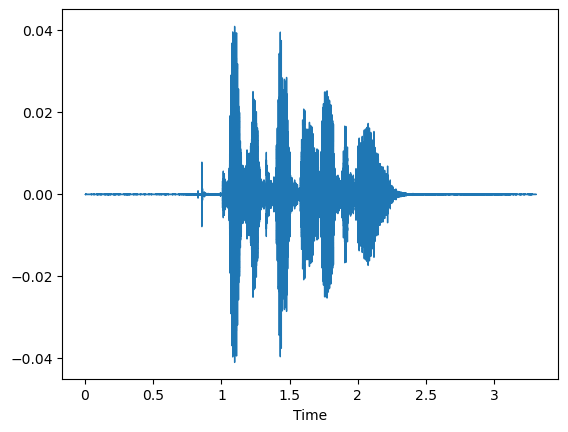

In [ ]:
path_ = 'C:/kaggle/ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav'# 1 is neutral but we get sad ❌ 
data_, sample_rate_ = librosa.load(path_)
X_ = np.array(extract_features(data_))
X_ = scaler.transform(X_.reshape(1,-1))
pred_test_ = model.predict(np.expand_dims(X_, axis=2))
y_pred_ = encoder.inverse_transform(pred_test_)
print(y_pred_[0][0]) #emotion prediction

for value, emotion in zip(pred_test_[0], encoder.categories_[0]):
    print(emotion, f"{value:.10f}") #predicting values for each emotion

librosa.display.waveshow(y=data_, sr=sample_rate_)
Audio(data_, rate=sample_rate_) #for showing and listening audio

1/1 [==============================] - 0s 16ms/step
sad
angry 0.0023147657
calm 0.0001990914
disgust 0.1386491954
fear 0.1685547829
happy 0.0219263919
neutral 0.2220214605
sad 0.4425577521
surprise 0.0037764979


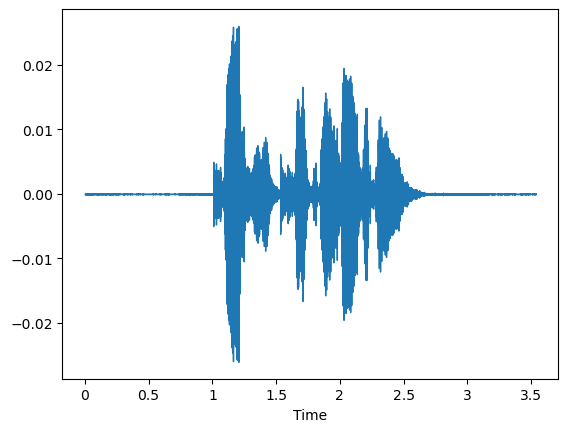

In [ ]:
path_ = 'C:/kaggle/ravdess/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-01-01.wav'#2 is calm but we get sad ❌ 
data_, sample_rate_ = librosa.load(path_)
X_ = np.array(extract_features(data_))
X_ = scaler.transform(X_.reshape(1,-1))
pred_test_ = model.predict(np.expand_dims(X_, axis=2))
y_pred_ = encoder.inverse_transform(pred_test_)
print(y_pred_[0][0]) #emotion prediction

for value, emotion in zip(pred_test_[0], encoder.categories_[0]):
    print(emotion, f"{value:.10f}") #predicting values for each emotion

librosa.display.waveshow(y=data_, sr=sample_rate_)
Audio(data_, rate=sample_rate_) #for showing and listening audio

1/1 [==============================] - 0s 15ms/step
surprise
angry 0.0187957268
calm 0.0000740379
disgust 0.0913240388
fear 0.1896650344
happy 0.0703129470
neutral 0.0878898352
sad 0.2096601874
surprise 0.3322781920


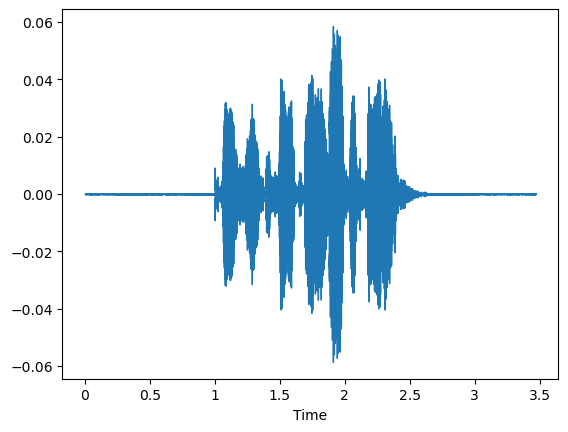

In [ ]:
path_ = 'C:/kaggle/ravdess/audio_speech_actors_01-24/Actor_01/03-01-03-01-01-01-01.wav' #3 is happy but we get suprise ❌ 
data_, sample_rate_ = librosa.load(path_)
X_ = np.array(extract_features(data_))
X_ = scaler.transform(X_.reshape(1,-1))
pred_test_ = model.predict(np.expand_dims(X_, axis=2))
y_pred_ = encoder.inverse_transform(pred_test_)
print(y_pred_[0][0]) #emotion prediction

for value, emotion in zip(pred_test_[0], encoder.categories_[0]):
    print(emotion, f"{value:.10f}") #predicting values for each emotion

librosa.display.waveshow(y=data_, sr=sample_rate_)
Audio(data_, rate=sample_rate_) #for showing and listening audio

1/1 [==============================] - 0s 16ms/step
sad
angry 0.0006936913
calm 0.0000002312
disgust 0.1399552673
fear 0.0784452036
happy 0.0114259534
neutral 0.0301390272
sad 0.6969215870
surprise 0.0424191020


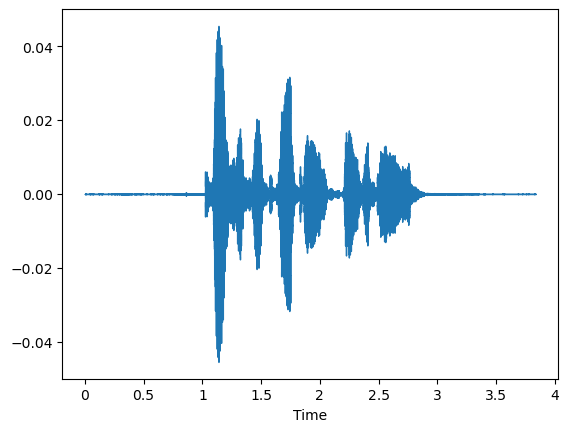

In [ ]:
path_ = 'C:/kaggle/ravdess/audio_speech_actors_01-24/Actor_01/03-01-04-01-01-01-01.wav' #4 is sad and we get sad ✅
data_, sample_rate_ = librosa.load(path_)
X_ = np.array(extract_features(data_))
X_ = scaler.transform(X_.reshape(1,-1))
pred_test_ = model.predict(np.expand_dims(X_, axis=2))
y_pred_ = encoder.inverse_transform(pred_test_)
print(y_pred_[0][0]) #emotion prediction

for value, emotion in zip(pred_test_[0], encoder.categories_[0]):
    print(emotion, f"{value:.10f}") #predicting values for each emotion

librosa.display.waveshow(y=data_, sr=sample_rate_)
Audio(data_, rate=sample_rate_) #for showing and listening audio

1/1 [==============================] - 0s 16ms/step
surprise
angry 0.0584027506
calm 0.0000005492
disgust 0.0175453797
fear 0.2725955248
happy 0.1334409863
neutral 0.0022555348
sad 0.0161450040
surprise 0.4996142983


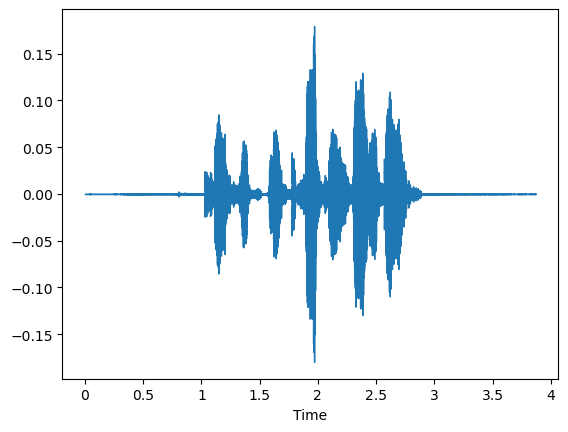

In [ ]:
path_ = 'C:/kaggle/ravdess/audio_speech_actors_01-24/Actor_01/03-01-05-01-01-01-01.wav' #5 is angry but we get suprise ❌
data_, sample_rate_ = librosa.load(path_)
X_ = np.array(extract_features(data_))
X_ = scaler.transform(X_.reshape(1,-1))
pred_test_ = model.predict(np.expand_dims(X_, axis=2))
y_pred_ = encoder.inverse_transform(pred_test_)
print(y_pred_[0][0]) #emotion prediction

for value, emotion in zip(pred_test_[0], encoder.categories_[0]):
    print(emotion, f"{value:.10f}") #predicting values for each emotion

librosa.display.waveshow(y=data_, sr=sample_rate_)
Audio(data_, rate=sample_rate_) #for showing and listening audio

1/1 [==============================] - 0s 23ms/step
fear
angry 0.0090577798
calm 0.0001898146
disgust 0.0601626150
fear 0.2785848975
happy 0.0657292977
neutral 0.2737915814
sad 0.2681961656
surprise 0.0442878976


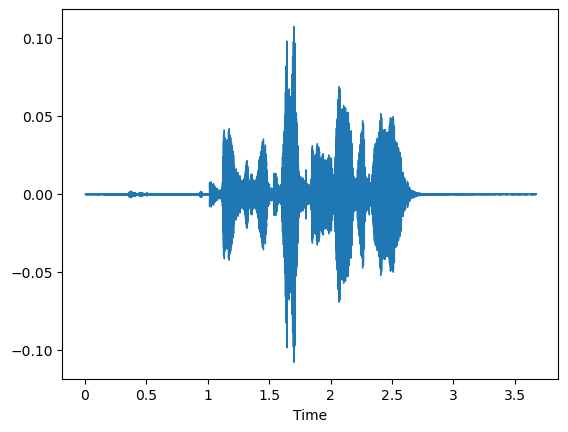

In [ ]:
path_ = 'C:/kaggle/ravdess/audio_speech_actors_01-24/Actor_01/03-01-06-01-01-01-01.wav' #6 is fear and we get fear ✅
data_, sample_rate_ = librosa.load(path_)
X_ = np.array(extract_features(data_))
X_ = scaler.transform(X_.reshape(1,-1))
pred_test_ = model.predict(np.expand_dims(X_, axis=2))
y_pred_ = encoder.inverse_transform(pred_test_)
print(y_pred_[0][0]) #emotion prediction

for value, emotion in zip(pred_test_[0], encoder.categories_[0]):
    print(emotion, f"{value:.10f}") #predicting values for each emotion

librosa.display.waveshow(y=data_, sr=sample_rate_)
Audio(data_, rate=sample_rate_) #for showing and listening audio

1/1 [==============================] - 0s 18ms/step
neutral
angry 0.0034802414
calm 0.0000294447
disgust 0.1008449420
fear 0.0640354902
happy 0.0121543938
neutral 0.5309934020
sad 0.2844130695
surprise 0.0040490534


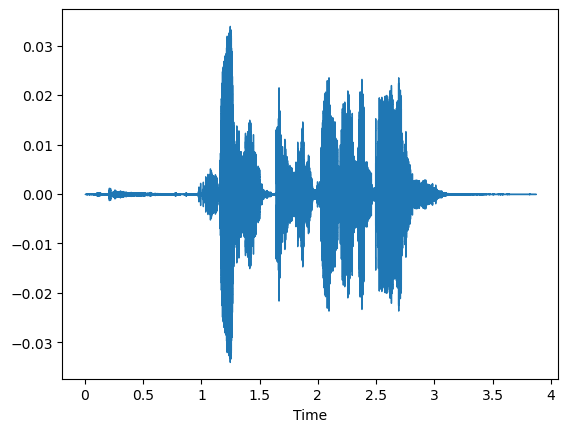

In [ ]:
path_ = 'C:/kaggle/ravdess/audio_speech_actors_01-24/Actor_01/03-01-07-01-01-01-01.wav' #7 is disgust and we get neutral ❌
data_, sample_rate_ = librosa.load(path_)
X_ = np.array(extract_features(data_))
X_ = scaler.transform(X_.reshape(1,-1))
pred_test_ = model.predict(np.expand_dims(X_, axis=2))
y_pred_ = encoder.inverse_transform(pred_test_)
print(y_pred_[0][0]) #emotion prediction

for value, emotion in zip(pred_test_[0], encoder.categories_[0]):
    print(emotion, f"{value:.10f}") #predicting values for each emotion

librosa.display.waveshow(y=data_, sr=sample_rate_)
Audio(data_, rate=sample_rate_) #for showing and listening audio

1/1 [==============================] - 0s 17ms/step
surprise
angry 0.0006331635
calm 0.0000000000
disgust 0.0010291601
fear 0.0009344993
happy 0.0017226834
neutral 0.0000002504
sad 0.0000713293
surprise 0.9956088662


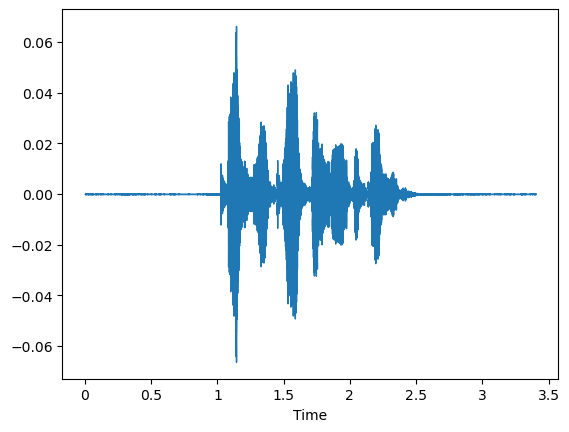

In [ ]:
path_ = 'C:/kaggle/ravdess/audio_speech_actors_01-24/Actor_01/03-01-08-01-01-01-01.wav' #8 is suprise and we get suprise ✅ so out of 8 test for actor 1 normal emotional intensity our model was able to predict 3 out of 8 correct 
data_, sample_rate_ = librosa.load(path_)
X_ = np.array(extract_features(data_))
X_ = scaler.transform(X_.reshape(1,-1))
pred_test_ = model.predict(np.expand_dims(X_, axis=2))
y_pred_ = encoder.inverse_transform(pred_test_)
print(y_pred_[0][0]) #emotion prediction

for value, emotion in zip(pred_test_[0], encoder.categories_[0]):
    print(emotion, f"{value:.10f}") #predicting values for each emotion

librosa.display.waveshow(y=data_, sr=sample_rate_)
Audio(data_, rate=sample_rate_) #for showing and listening audio